# Time Series Analysis

### Time Series Data

In [ ]:
import pandas as pd

series = pd.read_csv("https://raw.githubusercontent.com/selva86/datasets/master/a10.csv", parse_dates=["date"], index_col="date")
series.head()

,value
date,
1991-07-01,3.526591
1991-08-01,3.180891
1991-09-01,3.252221
1991-10-01,3.611003
1991-11-01,3.565869


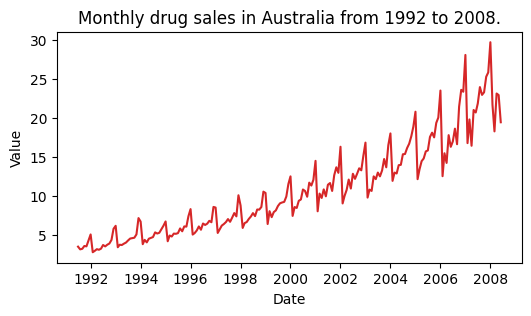

In [ ]:
import matplotlib.pyplot as plt
df = pd.read_csv("https://raw.githubusercontent.com/selva86/datasets/master/a10.csv", parse_dates=["date"], index_col="date")

def plot_df(df, x, y, title="", xlabel="Date", ylabel="Value", dpi=100):
    plt.figure(figsize=(6,3), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()

plot_df(df, x=df.index, y=df.value, title='Monthly drug sales in Australia from 1992 to 2008.')

### Panel Data

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/selva86/datasets/master/MarketArrivals.csv")
df = df.loc[df.market=="MUMBAI", :]
df.head()

,market,month,year,quantity,priceMin,priceMax,priceMod,state,city,date
6654,MUMBAI,January,2004,267100,719,971,849,MS,MUMBAI,January-2004
6655,MUMBAI,January,2005,275845,261,513,387,MS,MUMBAI,January-2005
6656,MUMBAI,January,2006,228000,315,488,402,MS,MUMBAI,January-2006
6657,MUMBAI,January,2007,205200,866,1136,997,MS,MUMBAI,January-2007
6658,MUMBAI,January,2008,267550,348,550,448,MS,MUMBAI,January-2008


### Patterns in a time series

Additive time series:
Value = Base Level + Trend + Seasonality + Error

Multiplicative Time Series:
Value = Base Level x Trend x Seasonality x Error

trend - an increasing or decreasing slope observed in the time series

seasonality - a distinct repeated pattern observed between regular intervals due to seasonal factors (because of the month of the year, day of the month, weekdays, etc.)

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse

df = pd.read_csv("https://raw.githubusercontent.com/selva86/datasets/master/a10.csv", parse_dates=["date"], index_col="date")

result_mul = seasonal_decompose(df["value"], model="multiplicative", extrapolate_trend="freq")
result_add = seasonal_decompose(df["value"], model="additive", extrapolate_trend="freq")

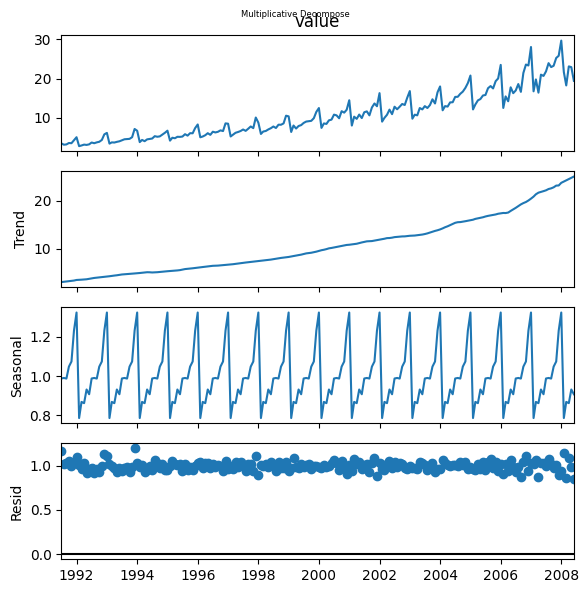

In [ ]:
plt.rcParams.update({"figure.figsize": (6,6)})
result_mul.plot().suptitle("Multiplicative Decompose", fontsize=6)
plt.show()

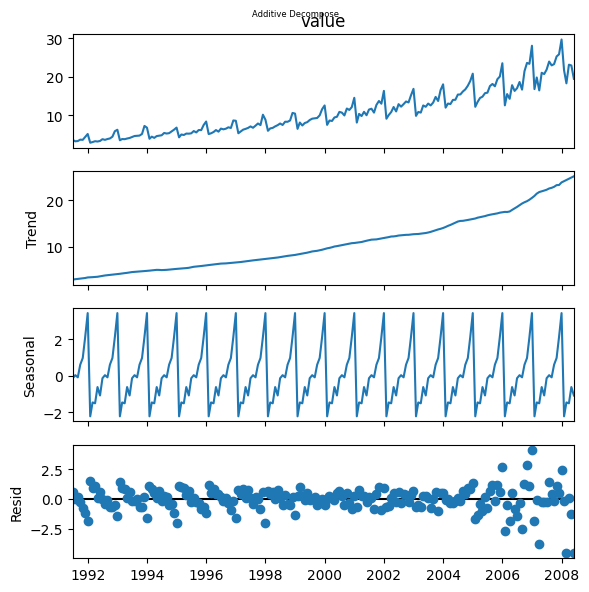

In [ ]:
plt.rcParams.update({"figure.figsize": (6,6)})
result_add.plot().suptitle("Additive Decompose", fontsize=6)
plt.show()

### Stationary and Non-stationary Time Series

- stationary series - the values of the series is not a function of time, the statistical properties of the series like mean, variance and autocorrelation are constant over time

- most common and convenient method to stationarize the series is by differencing the series at least once until it becomes approximately stationary

- Starting point: [1, 5, 2, 12, 20]

- First differencing gives: [5-1, 2-5, 12-2, 20-12] = [4, -3, 10, 8]

- Second differencing gives: [-3-4, -10-3, 8-10] = [-7, -13, -2]

- Autoregressive forecasting models (ARIMA, SARIMA, SARIMAX) are essentially linear regression models that utilize the lag(s) of the series itself as predictors.

- Linear regression works best if the predictors (X variables) are not correlated against each other. So, stationarizing the series solves this problem since it removes any persistent autocorrelation, thereby making the predictors(lags of the series) in the forecasting models nearly independent.

In [ ]:
from statsmodels.tsa.stattools import adfuller, kpss
df = pd.read_csv("https://raw.githubusercontent.com/selva86/datasets/master/a10.csv", parse_dates=["date"])

In [ ]:
# ADF Test
result = adfuller(df.value.values, autolag="AIC")
print(f"ADF Statistic: {result[0]}")
print(f"p-value: {result[1]}")

ADF Statistic: 3.14518568930673
p-value: 1.0


In [ ]:
# KPSS Test
result = kpss(df.value.values, regression="c")
print("\nKPSS Statistic: %f" % result[0])
print("p-value: %f" % result[1])


KPSS Statistic: 2.013126
p-value: 0.010000


<ipython-input-33-26d63bc5441c>:2: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  result = kpss(df.value.values, regression="c")


### Autocorrelation is Good, Multicolinearity is Bad

| **Target** \(Y_{t}\) | **Lag 1** \(Y_{t-1}\) | **Lag 2** \(Y_{t-2}\) | **Prediction** \(Y_t = \beta_1 Y_{t-1} + \beta_2 Y_{t-2}\) |
|--------------------|-----------------------|-----------------------|-----------------------------------------------------------|
| 10                 | 8                     | 7                     | \(10 = \beta_1(8) + \beta_2(7)\)                           |
| 12                 | 10                    | 8                     | \(12 = \beta_1(10) + \beta_2(8)\)                          |
| 15                 | 12                    | 10                    | \(15 = \beta_1(12) + \beta_2(10)\)                         |
| 18                 | 15                    | 12                    | \(18 = \beta_1(15) + \beta_2(12)\)                         |
| 20                 | 18                    | 15                    | \(20 = \beta_1(18) + \beta_2(15)\)                         |
